# Utilities 

In [59]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import scipy

# Data Ingestion 

In [241]:
df = pd.read_csv('twitter_df.csv')

df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['edit_history_tweet_ids'])
df.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN


In [296]:
df_loc = df[df.location.notnull()]

df_loc.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
131,596174897,1324917905180471302,2020-11-07T03:33:39.000Z,1324917905180471302,NaN,en,everyone,Twitter Web App,RT @danielchaitin7: Rep. Paul Gosar (@RepGosar...,NaN,...,Christian. Politically Independent of BOTH Pa...,Wanda,wandaoaj,USA,916,822,1,82035,NaN,['ProLife']
133,1309864416767139853,1325069965880258560,2020-11-07T13:37:53.000Z,1325069965880258560,NaN,en,everyone,Twitter for Android,RT @danielchaitin7: Rep. Paul Gosar (@RepGosar...,NaN,...,❤️LOVE MY PRESIDENT🇺🇲 @potus 🙏🌟#VETS #2A🔫 #Pro...,Patriot Mom✝️,Patriot76679474,"Arizona, USA 🌵",477,0,0,6464,"[{'end': 28, 'start': 22, 'username': 'potus'}]","['VETS', '2A', 'ProLife', 'Constitution', '1st..."
157,2453578782,1325112073047642113,2020-11-07T16:25:12.000Z,1325112073047642113,NaN,en,everyone,Twitter Web App,"Maricopa County (Phoenix), AZ currently Blue u...",NaN,...,"Blockchain focused, entered Rabbit Hole 2016. ...",Tracking Trades,trackingtrades,Rabbit Hole,426,147,9,3700,"[{'end': 68, 'start': 58, 'username': 'chainli...",NaN
160,290156022,1325153636305887232,2020-11-07T19:10:21.000Z,1325153636305887232,NaN,en,everyone,Twitter for Android,RT @Frankz2137: @Peoples_Pundit @LauraBaris Mr...,NaN,...,"🇺🇸 Black, Conservative, Yinzer, Nevadan, Pro 2...",🇺🇸President-Elect BT 2020🇺🇸,TylerGang412,"Las Vegas, NV",451,2880,4,8805,NaN,"['MAGA', 'KAG']"
163,556291837,1325162148641824768,2020-11-07T21:37:00.000Z,1325190539839369216,8.045005e+17,en,everyone,Twitter Web App,@Lwbayfront URL Correction\n\nLook at which st...,NaN,...,"https://t.co/wm3OwKQQo2 - because ""... not all...",Autumn Zajczerova,SexyAutumn1980,"Austin, TX",235,890,9,1863,NaN,NaN


In [300]:
df_loc['location']

131                               USA
133                    Arizona, USA 🌵
157                       Rabbit Hole
160                     Las Vegas, NV
163                        Austin, TX
                    ...              
3485                     New Hill, NC
3486    A nation partly divided. Why?
3487                      Nevada, USA
3489                       Lompoc, CA
3490                   Wisconsin, USA
Name: location, Length: 1177, dtype: object

In [244]:
#df['retweeted'] =df.apply(lambda row: row['author_id'] if pd.isnull(row['retweeted']) else row['retweeted'], axis=1)
df= df[df.retweeted.notnull()]
df.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN


# Graph Creation 

In [245]:
#Creates the graph with nodes as the author id and retweets as the retweets
G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted', ['like_count', 'quote_count',
       'reply_count', 'retweet_count','followers_count',
       'following_count', 'listed_count', 'tweet_count']) 

# G= G.to_directed()
# sorted(G.degree, key=lambda x: x[1], reverse=True)

## Subgraph Cration 

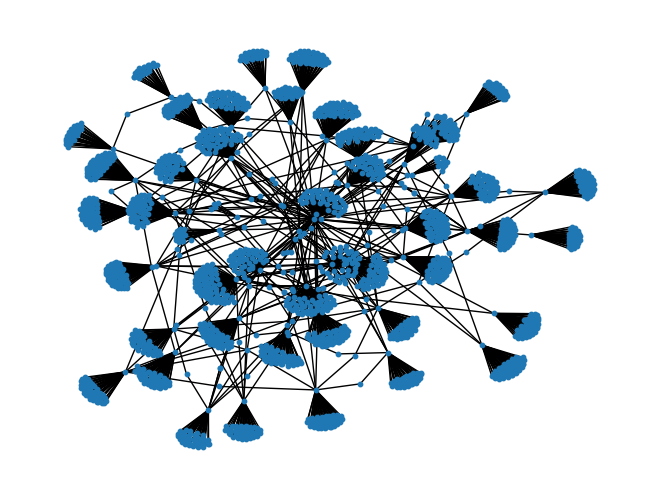

In [246]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
H= create_subgraph(G,1229060372105134080)

nx.draw(H, node_size=10)

In [247]:
largest_subgraph = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (_, val) in largest_subgraph.degree()]

largest_subgraph.number_of_nodes()#/3500 *100

1948

### Subgraph Visulization 

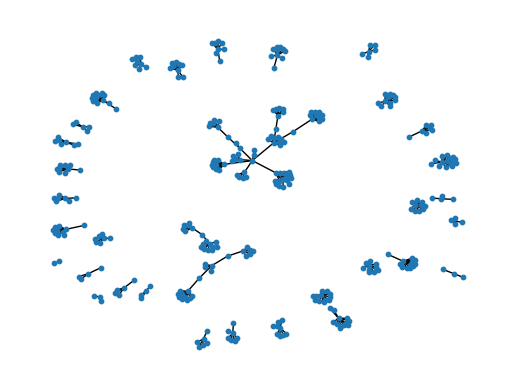

In [288]:
import random
random_sample_edges = random.sample(list(largest_subgraph.edges), 318)
G_sample = nx.Graph()
G_sample.add_edges_from(random_sample_edges)

plt.plot()
nx.draw(G_sample, node_size=10)
plt.show()

# Analysis 

## Centrality Analysis 

In [259]:
#Defines the draw function 
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

In [261]:
#Metrics 

def metrics(G):
    
    #trans = nx.transitivity(G)
    #avg = nx.average_clustering(G)
    #clust = nx.clustering(G)
    #assort = nx.degree_assortativity_coefficient(G)

    pos = nx.spring_layout(G)
    draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
    draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
    draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
    return



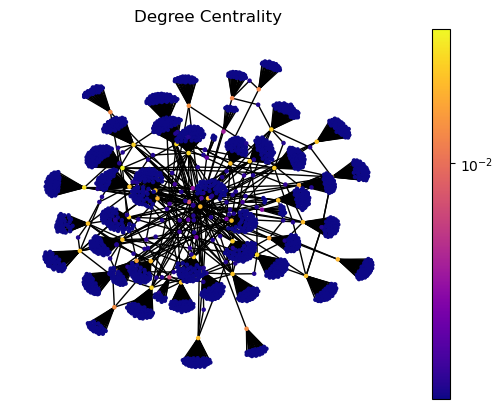

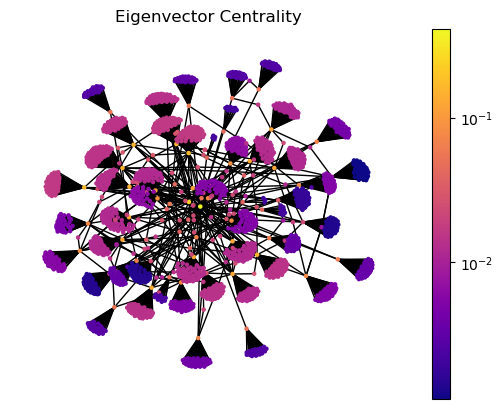

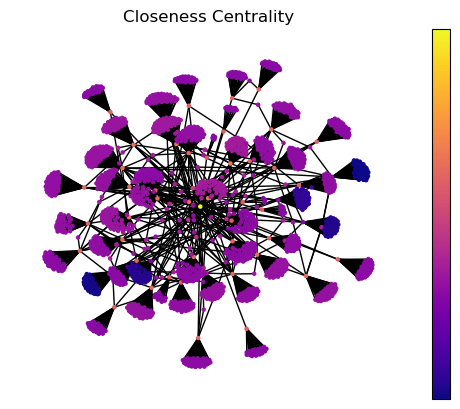

In [290]:
metrics(largest_subgraph)

## HK Model 

In [141]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    nodes = list(G.nodes) #Finds the node list of G
    n = G.number_of_nodes() #Finds the numeber of nodes in G from the node list 
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i] [t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i][j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i][j] * u #Adds to the denominator sum 
            x[i][t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

In [291]:
HK(largest_subgraph,0.1,4000) #With Tau value of 0.1

KeyboardInterrupt: 

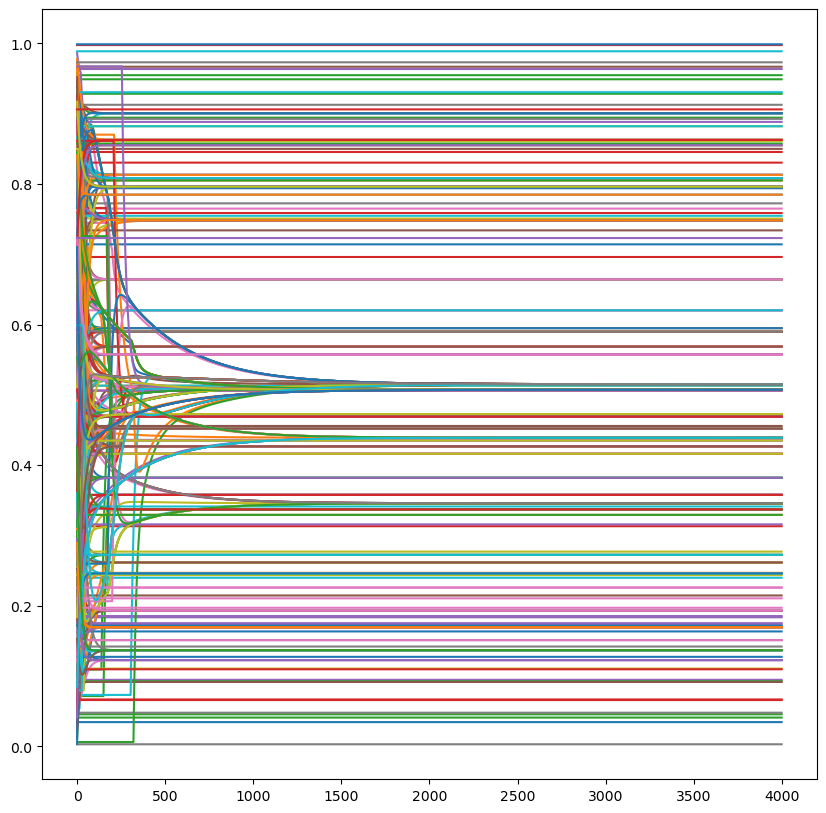

In [45]:
HK(G_sample,0.5,4000) #With Tau value of 0.5


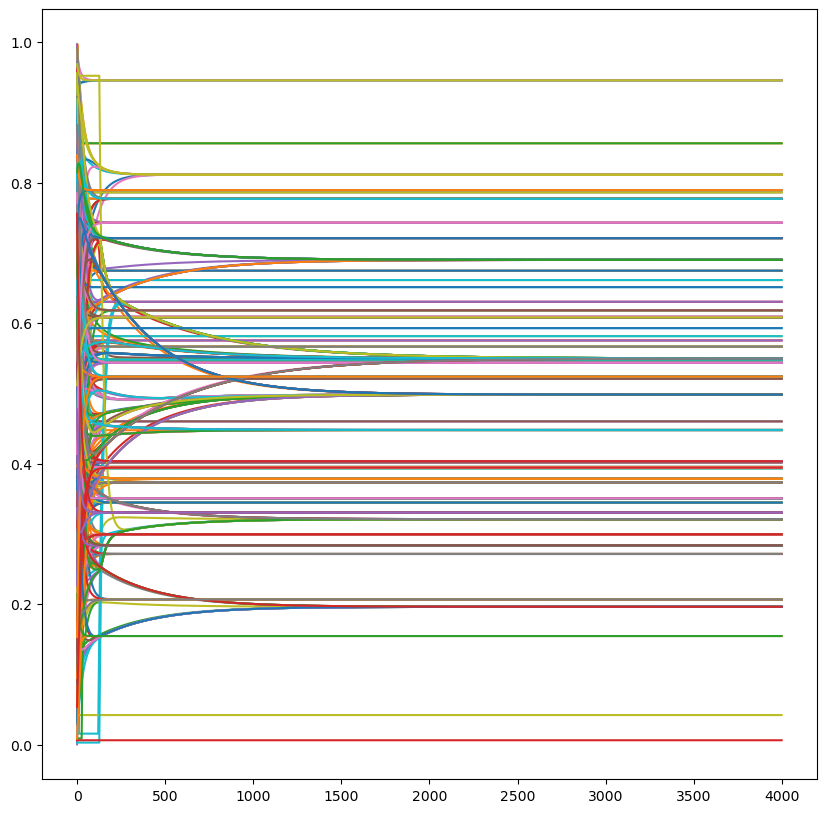

In [46]:
HK(G_sample,0.7,4000) #With Tau value of 0.7

## DeGroot Model

In [283]:
def degroot_model(G, timesteps):
    # initialize the beliefs of each node to 0
    beliefs = [0 for _ in range(G.number_of_nodes())]

    # simulate the convergence of the model over the specified number of timesteps
    for t in range(timesteps):
        # update the beliefs of each node using the DeGroot model
        beliefs = [sum(G.degree(i, weight='weight') * beliefs[i] for i in G[node]) for node in G]

        # normalize the beliefs of each node so that they sum to 1
        beliefs = [b / sum(beliefs) for b in beliefs]

        # visualize the convergence over time
        plt.plot(range(t+1), beliefs)
        plt.xlabel('Timestep')
        plt.ylabel('Belief')

    plt.show()

In [284]:
degroot_model(largest_subgraph, 10)

TypeError: list indices must be integers or slices, not float

## GCN Analysis 

In [278]:
import networkx as nx
import torch
import torch.nn as nn
import sklearn 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# create a GCN model for the graph
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # define the model layers
        self.gcn_layer = nn.Linear(in_features + hidden_features, hidden_features)
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x, adjacency_matrix):
        # apply the GCN layer using the adjacency matrix
        hidden = torch.relu(self.gcn_layer(torch.cat((x, torch.mm(adjacency_matrix, x)), dim=1)))

        # apply the output layer
        output = self.output_layer(hidden)

        return output

gcn = GCN(in_features=1, hidden_features=1, out_features=1)

# create an input tensor for the graph with shape (number of nodes, number of input features)
x = torch.randn(largest_subgraph.number_of_nodes(), 1)

# create an adjacency matrix for the graph with shape (number of nodes, number of nodes)
adjacency_matrix = torch.tensor(nx.to_numpy_matrix(largest_subgraph), dtype=torch.float)

# apply the GCN model to the input tensor and adjacency matrix
output = gcn(x, adjacency_matrix)

# reduce the dimensions of the output using TSNE
tsne = TSNE(n_components=2)
embedding_2d = tsne.fit_transform(tsne)

# plot the 2d embedding of the graph
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])
plt.show()

AttributeError: 'TSNE' object has no attribute 'shape'

## Opinion Evolution 

In [273]:
from networkx.algorithms import community
nx.community.louvain_communities(G)

[{18086847,
  21452155,
  36201675,
  49181414,
  51445034,
  62835123,
  68091766,
  77679836,
  98279552,
  112290378,
  150406341,
  155470237,
  159644446,
  173831487,
  252286126,
  290156022,
  346010827,
  376843909,
  472280658,
  480050793,
  570524532,
  596174897,
  707938453,
  796175233,
  840042230,
  862169906,
  1061308099,
  1259468580,
  1408294447,
  1416964124,
  2297467703,
  2453578782,
  2670160589,
  2823280973,
  2841819968,
  3015927613,
  3929993421,
  4281810921,
  709196418733449216,
  767424168669229057,
  775905636005445632,
  777134749424820224,
  843254775990829056,
  858110570289143808,
  864923719436836864,
  955685794433318912,
  1177290381525807104,
  1252347204498608128,
  1285333613677088772,
  1286817818948907008,
  1290373560704221184,
  1308544751042404355,
  1309864416767139853,
  1314017763476664320,
  1323324916771524609,
  1.32486661401421e+18},
 {16482012,
  19956833,
  22949852,
  24658978,
  42075120,
  43769544,
  69935036,
  74259728,

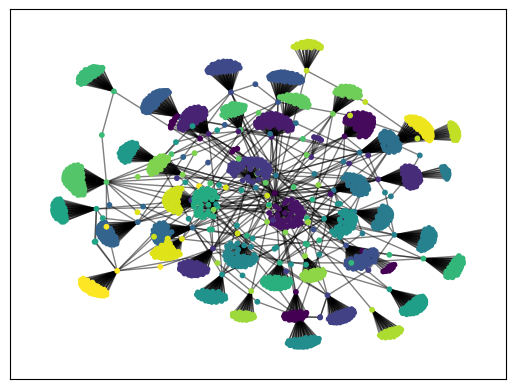

In [271]:
import matplotlib.cm as cm
import community.community_louvain as community_louvain
#first compute the best partition

# load the karate club graph

partition = community_louvain.best_partition(largest_subgraph)

# draw the graph
pos = nx.spring_layout(largest_subgraph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(largest_subgraph, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(largest_subgraph, pos, alpha=0.5)
plt.show()

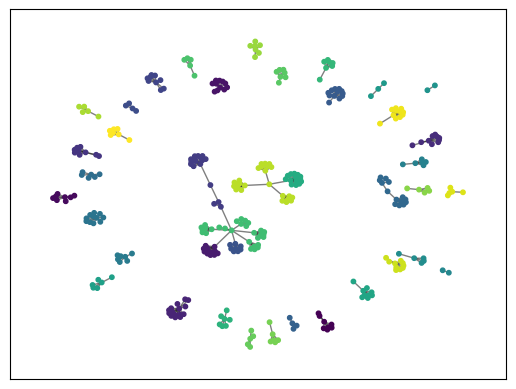

In [269]:
partition = community_louvain.best_partition(G_sample)

# draw the graph
pos = nx.spring_layout(G_sample)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_sample, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_sample, pos, alpha=0.5)
plt.show()